In [ ]:
##Libraies 
import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_dir  = '/content/gdrive/MyDrive/chest_xray/train'
test_dir = '/content/gdrive/MyDrive/chest_xray/test'
#val_dir='/content/gdrive/MyDrive/chest_xray/val'

In [ ]:

model           = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics =['acc'])

In [ ]:
train_datagen= ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
#val_datagen =ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
os.listdir(train_dir)
os.listdir(test_dir)
#os.listdir(val_dir)

['1', '0']

In [ ]:

os.listdir(train_dir)

['1', '0']

In [ ]:
os.listdir(train_dir+'/0')


In [ ]:
os.listdir(train_dir+'/1')

In [ ]:
image = cv2.imread(train_dir+'/0/'+'NORMAL2-IM-1329-0001.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

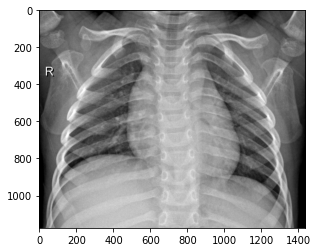

In [ ]:
plt.imshow(image)

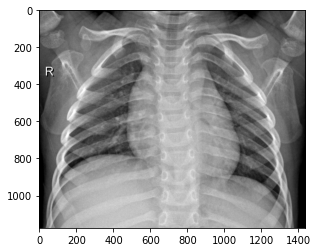

In [ ]:
plt.imshow(image_rgb)

In [ ]:
np.array(image_rgb)

array([[[115, 115, 115],
        [111, 111, 111],
        [106, 106, 106],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [108, 108, 108]],

       [[102, 102, 102],
        [112, 112, 112],
        [108, 108, 108],
        ...,
        [106, 106, 106],
        [108, 108, 108],
        [108, 108, 108]],

       [[ 96,  96,  96],
        [107, 107, 107],
        [115, 115, 115],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [106, 106, 106]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
batch_size = 10
 
# ကိုယ်ယူတဲ့ Target Size တွေကို မှတ်ထားပါ နောက်ပြန်သုံးမှာမို့
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 batch_size=batch_size,
                                                 class_mode='binary')
 
test_set = test_datagen .flow_from_directory(test_dir,
                                            target_size=(150,150),
                                            batch_size=batch_size,
                                            class_mode='binary')
'''
val_set = val_datagen .flow_from_directory(val_dir,
                                            target_size=(28, 28),
                                            batch_size=batch_size,
                                            class_mode='binary')
                                            '''

Found 6476 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


"\nval_set = val_datagen .flow_from_directory(val_dir,\n                                            target_size=(28, 28),\n                                            batch_size=batch_size,\n                                            class_mode='binary')\n                                            "

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
history = model.fit(training_set,
                              #validation_data = validation_set,
                              steps_per_epoch=5216//batch_size,
                        
                         epochs=10,
                         #validation_steps=validation_length//batch_size,
                         #validation_steps=1000//batch_size,
                         verbose = 2,
                         shuffle = False)

Epoch 1/10
521/521 - 69s - loss: 0.1860 - acc: 0.9273 - 69s/epoch - 132ms/step
Epoch 2/10
521/521 - 68s - loss: 0.1003 - acc: 0.9622 - 68s/epoch - 130ms/step
Epoch 3/10
521/521 - 67s - loss: 0.0769 - acc: 0.9716 - 67s/epoch - 129ms/step
Epoch 4/10
521/521 - 68s - loss: 0.0571 - acc: 0.9810 - 68s/epoch - 131ms/step
Epoch 5/10
521/521 - 68s - loss: 0.0471 - acc: 0.9829 - 68s/epoch - 131ms/step
Epoch 6/10
521/521 - 68s - loss: 0.0300 - acc: 0.9881 - 68s/epoch - 130ms/step
Epoch 7/10
521/521 - 69s - loss: 0.0224 - acc: 0.9912 - 69s/epoch - 132ms/step
Epoch 8/10
521/521 - 68s - loss: 0.0157 - acc: 0.9956 - 68s/epoch - 131ms/step
Epoch 9/10
521/521 - 69s - loss: 0.0147 - acc: 0.9952 - 69s/epoch - 132ms/step
Epoch 10/10
521/521 - 68s - loss: 0.0137 - acc: 0.9946 - 68s/epoch - 130ms/step


In [ ]:
model.save('/content/TeamKSM.h5')

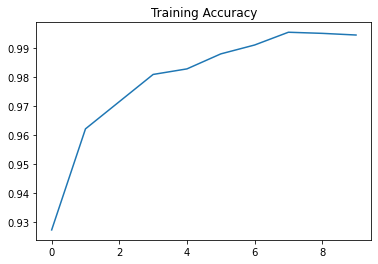

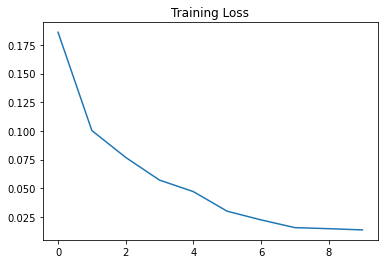

In [ ]:
acc = history.history[     'acc' ]
#val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 
plt.plot  ( epochs,     acc ,label = 'Accuracy')
#plt.plot  ( epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.title ('Training Accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
#plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')
plt.title ('Training Loss')

plt.show()

In [ ]:
classes = model.predict(test_set)

In [ ]:
#  တစ်ပုံချင်းစီကို Testလုပ်တာ
folder_names = ['0','1']
y_pred = []
for folder in folder_names:
    path = test_dir+"/"+folder
    path_fnames = os.listdir(path)
    for i in path_fnames:
        path2 = path+'/'+i
        img = tf.keras.preprocessing.image.load_img(path2, target_size=(150,150))#target size ကို သတိထားပါ
        x = tf.keras.preprocessing.image.img_to_array(img)
        x = np.expand_dims(x,axis=0)
        x /= 255.0
        images = np.vstack([x])# [1 2 3 4 5 6]
        classes = model.predict(x)
        print(classes)

       # y_classes=classes.argmax(axis=-1)
        if classes[0] >=0.5:
          y_classes=1
        else:
          y_classes=0
       # print(y_classes)
        #print()
        y_pred.append(y_classes)
    print()
    

[[0.28480068]]
[[0.99815303]]
[[0.01371935]]
[[0.6995202]]
[[0.9959149]]
[[0.02782289]]
[[0.77051044]]
[[0.50194]]
[[0.9999944]]
[[0.99950576]]
[[0.9034499]]
[[1.]]
[[0.9994056]]
[[0.9680168]]
[[0.9996165]]
[[0.9958438]]
[[0.99999976]]
[[0.99991]]
[[0.0075695]]
[[0.84480697]]
[[0.9997577]]
[[0.10265148]]
[[0.99872345]]
[[0.00039474]]
[[0.00030921]]
[[0.9694876]]
[[0.96921957]]
[[0.00104947]]
[[0.99995613]]
[[0.999995]]
[[0.00096644]]
[[0.9999995]]
[[0.9999962]]
[[0.34777683]]
[[0.99787796]]
[[0.00275043]]
[[0.994445]]
[[0.99999964]]
[[1.]]
[[0.04077916]]
[[0.00180625]]
[[0.9085863]]
[[0.0017974]]
[[0.00117312]]
[[0.12763359]]
[[0.9993845]]
[[0.9943473]]
[[0.9048432]]
[[0.00461987]]
[[0.01687988]]
[[0.03247584]]
[[0.99986875]]
[[1.]]
[[0.9999995]]
[[0.99999034]]
[[0.5324471]]
[[0.95732814]]
[[1.]]
[[0.11766452]]
[[0.89518464]]
[[0.81009245]]
[[0.0191477]]
[[0.88008153]]
[[0.00309906]]
[[0.9993494]]
[[0.9988418]]
[[1.]]
[[1.394377e-05]]
[[0.9999995]]
[[0.58630526]]
[[0.99928635]]
[[0.585

In [ ]:
y_true = test_set.classes.tolist()
print(len(y_true))

624


In [ ]:
class_dictionary = test_set.class_indices
print('Labels dictionary',class_dictionary)

Labels dictionary {'0': 0, '1': 1}


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true,y_pred)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[ 62 172]
 [  2 388]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(y_true, y_pred)*100,'%')
print('Precision Macro Score',precision_score(y_true, y_pred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_true, y_pred, average = 'macro')*100,'%')
print('F1 Score',f1_score(y_true, y_pred, average='macro')*100,'%')

Accuracy Score 72.11538461538461 %
Precision Macro Score 83.08035714285714 %
Recall_Score 62.99145299145299 %
F1 Score 61.647474390674674 %


In [ ]:
import tensorflow as tf
import numpy as np
model_file = tf.keras.models.load_model('/content/TeamKSM.h5')

In [ ]:
path = input('Enter the path of your image in order to predict:')

Enter the path of your image in order to predict:/content/gdrive/MyDrive/chest_xray/test/0/IM-0001-0001.jpeg


Model မှခန့်မှန်း လိုက်သော အဖြေမှာ  Normal ဖြစ်ပါသည်။


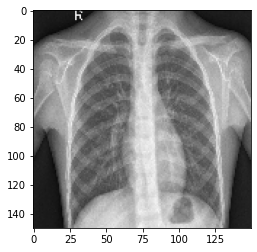

In [ ]:
import matplotlib.pyplot as plt
img = tf.keras.preprocessing.image.load_img(path, target_size=(150,150))
plt.imshow(img)
dictionary = {0:'Normal',1:'Pneumonia'}
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x /= 255.0
images = np.vstack([x])
classes = model_file.predict(x)
#y_classes=classes.argmax(axis=-1)
if classes[0] >=0.5:
  y_classes=1
else:
  y_classes=0
label = y_classes#9
#print(label)
print("Model မှခန့်မှန်း လိုက်သော အဖြေမှာ ",dictionary[label], "ဖြစ်ပါသည်။")